In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
def load_and_process(url_or_path_to_csv_file):
    # Method Chain 1 (Load data, deal with missing data, and making data readable)
    df1 = (
        pd.read_csv(url_or_path_to_csv_file)
        .dropna()
        .rename(columns ={"LOCAL_DATE":"DATE"})
        .sort_values("DATE", ascending=False)
        .reset_index(drop = True)
        
      )
    return df1

In [3]:
df = load_and_process('Canadian_climate_history (1970-2020).csv')
df

,DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,9/9/99 00:00,14.2,0.0,14.5,1.0,23.3,0.0,22.0,1.2,23.40,...,10.3,0.4,20.8,3.0,15.1,0.2,7.2,1.4,10.00,1.60
1,9/9/98 00:00,12.1,0.0,11.0,0.6,15.0,0.0,14.4,0.0,15.80,...,20.8,0.0,14.0,0.0,14.5,0.0,5.4,0.0,21.40,0.00
2,9/9/95 00:00,13.2,0.0,15.3,0.0,14.8,0.6,10.9,0.0,13.00,...,12.7,3.3,12.9,0.0,16.5,0.0,11.8,1.9,9.70,0.00
3,9/9/94 00:00,13.0,0.0,13.1,9.8,16.6,0.0,15.4,5.0,14.40,...,15.0,2.0,14.8,0.0,13.2,10.8,7.1,6.0,22.40,0.00
4,9/9/93 00:00,12.1,0.0,11.9,0.0,18.2,0.0,15.8,1.3,16.70,...,10.0,8.4,15.8,4.8,19.2,0.0,11.9,0.2,10.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,1/1/04 00:00,-12.5,1.0,-16.4,3.7,-3.8,0.0,-6.4,0.0,-3.75,...,-1.1,1.0,1.2,0.0,1.6,0.0,-16.6,0.0,-10.10,0.35
13438,1/1/03 00:00,-6.1,0.0,-11.3,0.0,-0.1,0.9,-3.1,3.4,-3.80,...,-1.6,6.2,-3.7,0.0,5.9,21.6,-8.0,0.0,-10.10,0.00
13439,1/1/02 00:00,-15.0,0.0,-22.3,0.0,-7.5,0.0,-9.6,0.0,-10.60,...,-4.9,9.8,-5.9,0.0,3.9,11.6,-15.4,0.0,-13.50,0.00
13440,1/1/01 00:00,-0.2,0.0,-3.2,0.0,-1.4,0.0,-3.1,1.0,-8.70,...,0.0,1.8,-13.1,0.0,7.8,0.0,-5.9,0.0,-21.35,0.00


In [4]:
#Method Chain 2 (Creating new columns for different regions of Canada)
def group_columns(df):
    df2 = (
        #create new columns that take mean temperature and percipitation from Atlantic Provinces 
        df
        .assign(TEMPERATURE_ATLANTIC = (df.iloc[:, [5, 7, 17]].mean(axis=1)).round(decimals=1))
        .assign(PERCIPITATION_ATLANTIC = (df.iloc[:, [6, 8, 18]].mean(axis=1)).round(decimals=1))
        
        #create new columns that take mean temperature and percipitation from Prairie provinces 
        .assign(TEMPERATURE_PRAIRIES = (df.iloc[:, [1, 3, 15, 25]].mean(axis=1)).round(decimals=1))
        .assign(PERCIPITATION_PRAIRIES = (df.iloc[:, [2, 4, 16, 26]].mean(axis=1)).round(decimals=1))
        
        #create new columns that take mean temperature and percipitation from cities in Ontario and merge into single column
        .assign(TEMPERATURE_ONTARIO = (df.iloc[:, [11, 19]].mean(axis=1)).round(decimals=1))
        .assign(PERCIPITATION_ONTARIO = (df.iloc[:, [12, 20]].mean(axis=1)).round(decimals=1))
        
         #create new columns that take mean temperature and percipitation from cities in Quebec and merge into single column
        .assign(TEMPERATURE_QUEBEC = (df.iloc[:, [9, 13]].mean(axis=1)).round(decimals=1))
        .assign(PERCIPITATION_QUEBEC = (df.iloc[:, [10, 14]].mean(axis=1)).round(decimals=1))
        
        #dropping columns that were amalgimated into the means
        .drop(columns = ['MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON', 
                         'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX', 'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON',
                        'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON', 'MEAN_TEMPERATURE_STJOHNS', 'TOTAL_PRECIPITATION_STJOHNS',
                        'MEAN_TEMPERATURE_WINNIPEG', 'TOTAL_PRECIPITATION_WINNIPEG', 'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA',
                        'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO', 'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL',
                        'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC'])
        
        #renaming columns to meet new location based naming
        .rename(columns ={"MEAN_TEMPERATURE_VANCOUVER":"TEMPERATURE_BRITISH_COLUMBIA"})
        .rename(columns ={"TOTAL_PRECIPITATION_VANCOUVER":"PRECIPITATION_BRITISH_COLUMBIA"})
        .rename(columns ={"MEAN_TEMPERATURE_WHITEHORSE":"TEMPERATURE_NORTHERN"})
        .rename(columns ={"TOTAL_PRECIPITATION_WHITEHORSE":"PRECIPITATION_NORTHERN"})
    )
        
    return df2

In [5]:
group_columns(df)

,DATE,TEMPERATURE_BRITISH_COLUMBIA,PRECIPITATION_BRITISH_COLUMBIA,TEMPERATURE_NORTHERN,PRECIPITATION_NORTHERN,TEMPERATURE_ATLANTIC,PERCIPITATION_ATLANTIC,TEMPERATURE_PRAIRIES,PERCIPITATION_PRAIRIES,TEMPERATURE_ONTARIO,PERCIPITATION_ONTARIO,TEMPERATURE_QUEBEC,PERCIPITATION_QUEBEC
0,9/9/99 00:00,15.1,0.2,7.2,1.4,18.5,0.5,12.2,0.6,21.4,7.9,21.8,5.8
1,9/9/98 00:00,14.5,0.0,5.4,0.0,16.7,0.0,16.3,0.3,14.5,0.0,14.2,6.0
2,9/9/95 00:00,16.5,0.0,11.8,1.9,12.8,1.3,13.0,0.0,12.8,0.0,12.3,0.0
3,9/9/94 00:00,13.2,10.8,7.1,6.0,15.7,2.3,16.8,2.4,13.4,0.0,13.6,7.7
4,9/9/93 00:00,19.2,0.0,11.9,0.2,14.7,3.2,11.6,0.0,15.6,4.6,15.8,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,1/1/04 00:00,1.6,0.0,-16.6,0.0,-3.8,0.3,-14.3,1.3,-1.3,0.0,-6.4,0.2
13438,1/1/03 00:00,5.9,21.6,-8.0,0.0,-1.6,3.5,-10.5,0.0,-4.6,0.0,-4.8,1.0
13439,1/1/02 00:00,3.9,11.6,-15.4,0.0,-7.3,3.3,-17.9,0.0,-8.6,0.0,-12.0,0.2
13440,1/1/01 00:00,7.8,0.0,-5.9,0.0,-1.5,0.9,-9.0,0.2,-12.4,0.0,-7.0,0.0


In [6]:
#Method Chain 3 (Summarizing the data into graphs and tables)
def graphed_temperature_data(df):
    new = group_columns(df)
    temp = new.drop(columns = ['PRECIPITATION_BRITISH_COLUMBIA', 'PRECIPITATION_NORTHERN', 'PERCIPITATION_ATLANTIC',
                             'PERCIPITATION_PRAIRIES', 'PERCIPITATION_ONTARIO', 'PERCIPITATION_QUEBEC'])
    graph = temp.plot(title = "Temperature Trend in Canada", style = "--")
    graph.set_ylabel("Temperature in Regions")
    graph.set_xlabel("Year")

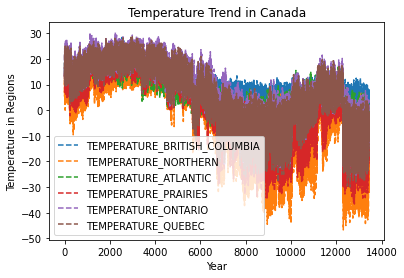

In [7]:
df = load_and_process('Canadian_climate_history (1970-2020).csv')
graphed_temperature_data(df)

In [8]:
def graphed_precipitation_data(df):
    new = group_columns(df)
    temp = new.drop(columns = ['TEMPERATURE_BRITISH_COLUMBIA', 'TEMPERATURE_NORTHERN', 'TEMPERATURE_ATLANTIC',
                             'TEMPERATURE_PRAIRIES', 'TEMPERATURE_ONTARIO', 'TEMPERATURE_QUEBEC'])
    graph = temp.plot(title = "Precipitation Trend in Canada", style = "--")
    graph.set_ylabel("Temperature in Regions")
    graph.set_xlabel("Year")

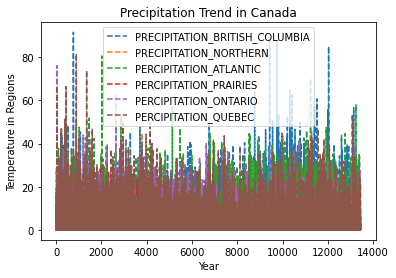

In [9]:
df = load_and_process('Canadian_climate_history (1970-2020).csv')
graphed_precipitation_data(df)

In [15]:
def summarized_data(df):
    df3 = (
        df.describe()
    )
    return df3  

In [17]:
df = load_and_process('Canadian_climate_history (1970-2020).csv')
dfupdate = group_columns(df)
summarized_data(dfupdate)

,TEMPERATURE_BRITISH_COLUMBIA,PRECIPITATION_BRITISH_COLUMBIA,TEMPERATURE_NORTHERN,PRECIPITATION_NORTHERN,TEMPERATURE_ATLANTIC,PERCIPITATION_ATLANTIC,TEMPERATURE_PRAIRIES,PERCIPITATION_PRAIRIES,TEMPERATURE_ONTARIO,PERCIPITATION_ONTARIO,TEMPERATURE_QUEBEC,PERCIPITATION_QUEBEC
count,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000,13442.000000
mean,10.211657,3.191794,-0.447999,0.738476,5.577005,3.815132,3.052336,1.192315,7.023962,2.377637,5.444852,2.968115
std,5.764915,6.555784,12.744257,1.993064,9.374004,6.039745,12.402578,2.406615,11.343336,4.833853,11.998804,5.836043
min,-11.500000,0.000000,-46.700000,0.000000,-21.700000,0.000000,-36.600000,0.000000,-27.100000,0.000000,-30.000000,0.000000
25%,5.900000,0.000000,-8.200000,0.000000,-1.500000,0.100000,-5.900000,0.000000,-1.675000,0.000000,-3.600000,0.000000
50%,10.000000,0.000000,1.800000,0.000000,5.700000,1.300000,4.800000,0.200000,7.600000,0.200000,6.400000,0.300000
75%,15.000000,3.500000,9.800000,0.400000,13.600000,4.900000,13.900000,1.300000,17.000000,2.500000,15.800000,3.200000
max,28.400000,91.600000,23.900000,44.900000,24.300000,80.600000,25.400000,34.500000,30.400000,76.100000,28.600000,81.600000
